Cleaning the Data

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')

# Step 1.1: Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 1.2: Check data types of each column
data_types = data.dtypes
print("Data Types:\n", data_types)

# Step 1.3: Remove leading/trailing whitespace from column names
data.columns = data.columns.str.strip()
print("Cleaned Column Names:\n", data.columns)

# Step 1.4: Check unique values in categorical columns to detect any inconsistencies
unique_values = {
    'education': data['education'].unique(),
    'self_employed': data['self_employed'].unique(),
    'loan_status': data['loan_status'].unique()
}
print("Unique Values Before Cleaning:\n", unique_values)

# Step 1.5: Strip leading/trailing spaces in categorical columns
data['education'] = data['education'].str.strip()
data['self_employed'] = data['self_employed'].str.strip()
data['loan_status'] = data['loan_status'].str.strip()

# Verify the unique values again after cleaning
unique_values_cleaned = {
    'education': data['education'].unique(),
    'self_employed': data['self_employed'].unique(),
    'loan_status': data['loan_status'].unique()
}
print("Unique Values After Cleaning:\n", unique_values_cleaned)

# Step 1.6: Check for duplicate rows in the dataset
duplicates = data.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

# Step 1.7: Summary statistics for key numerical columns to identify potential outliers
numerical_columns = ['income_annum', 'loan_amount', 'cibil_score']
outlier_check = data[numerical_columns].describe()
print("Outlier Check - Summary Statistics:\n", outlier_check)

Missing Values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
Data Types:
 loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object
Cleaned Column Names:
 Index(['loan_id', 'no_of_dependents', 'education'

Analyzing Feature Correlations, Impact on Target, and Independence Assumptions

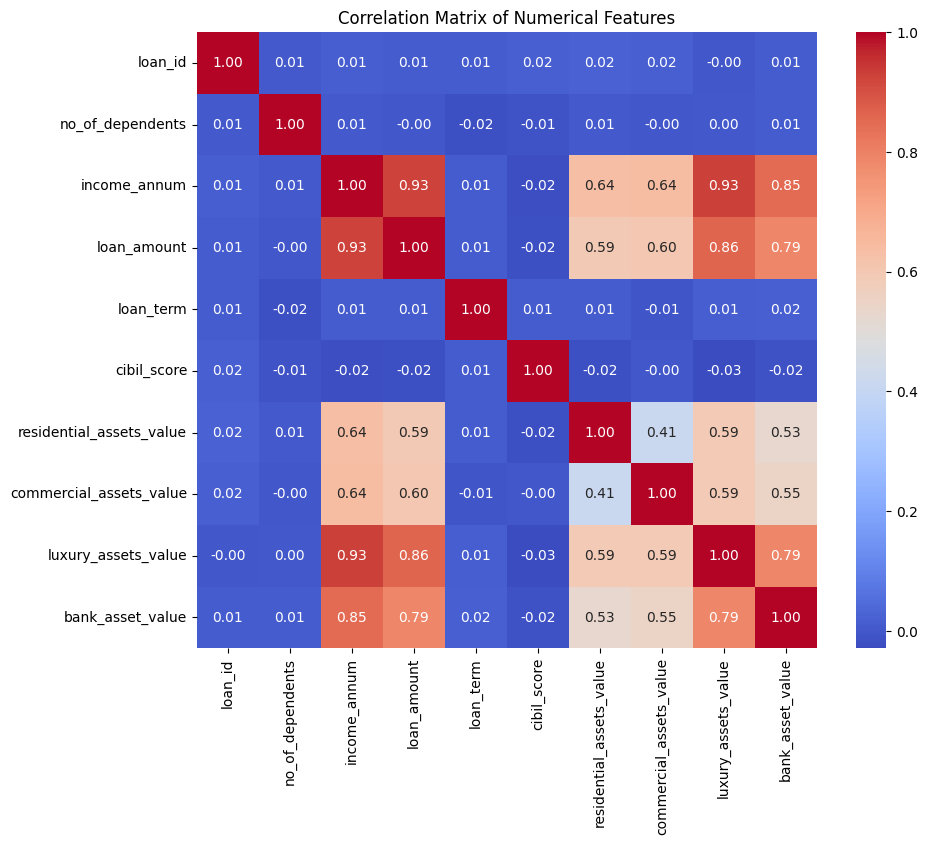

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Visualizing Numerical Feature Distribution by Loan Status

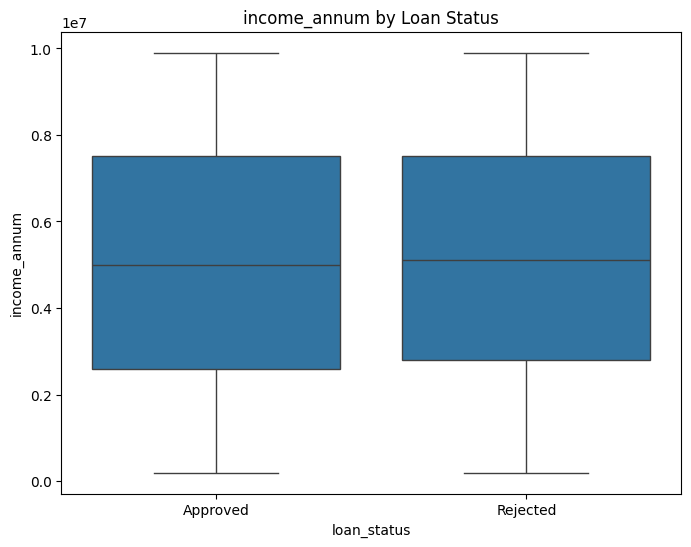

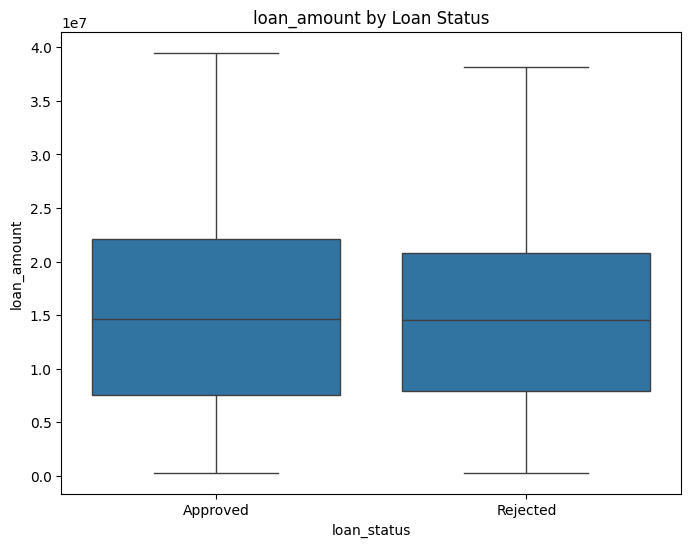

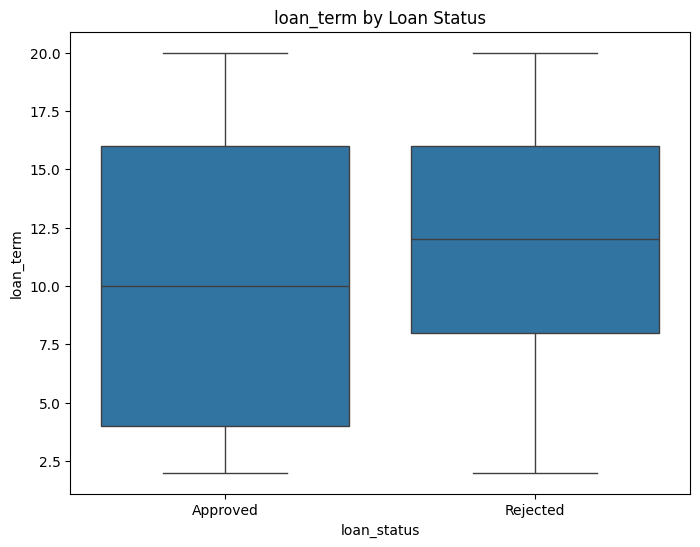

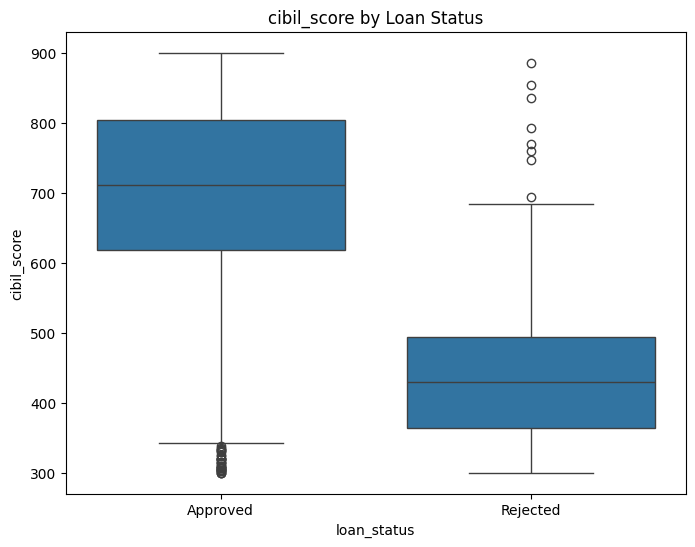

In [12]:
# Boxplots of numerical features by loan_status
numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='loan_status', y=feature)
    plt.title(f"{feature} by Loan Status")
    plt.show()

Chi-square Test for Categorical Features and Target

In [13]:
from scipy.stats import chi2_contingency

# Categorical features to assess relationship with loan_status
categorical_features = ['education', 'self_employed']

for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['loan_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature} and loan_status:")
    print(f"Chi2: {chi2}, p-value: {p}\n")

Chi-square test for education and loan_status:
Chi2: 0.08395754138250573, p-value: 0.7720042291016309

Chi-square test for self_employed and loan_status:
Chi2: 0.0, p-value: 1.0



Evaluating Independence Assumptions Between Features

In [14]:
# Evaluate if pairs of features are independent by reusing the correlation matrix
# Highly correlated features (> 0.7 or < -0.7) suggest potential dependence

correlated_features = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("Highly correlated features (suggesting lack of independence):")
print(correlated_features)

Highly correlated features (suggesting lack of independence):
                          loan_id  no_of_dependents  income_annum  \
loan_id                       1.0               NaN           NaN   
no_of_dependents              NaN               1.0           NaN   
income_annum                  NaN               NaN      1.000000   
loan_amount                   NaN               NaN      0.927470   
loan_term                     NaN               NaN           NaN   
cibil_score                   NaN               NaN           NaN   
residential_assets_value      NaN               NaN           NaN   
commercial_assets_value       NaN               NaN           NaN   
luxury_assets_value           NaN               NaN      0.929145   
bank_asset_value              NaN               NaN      0.851093   

                          loan_amount  loan_term  cibil_score  \
loan_id                           NaN        NaN          NaN   
no_of_dependents                  NaN        NaN

Correlation Plot

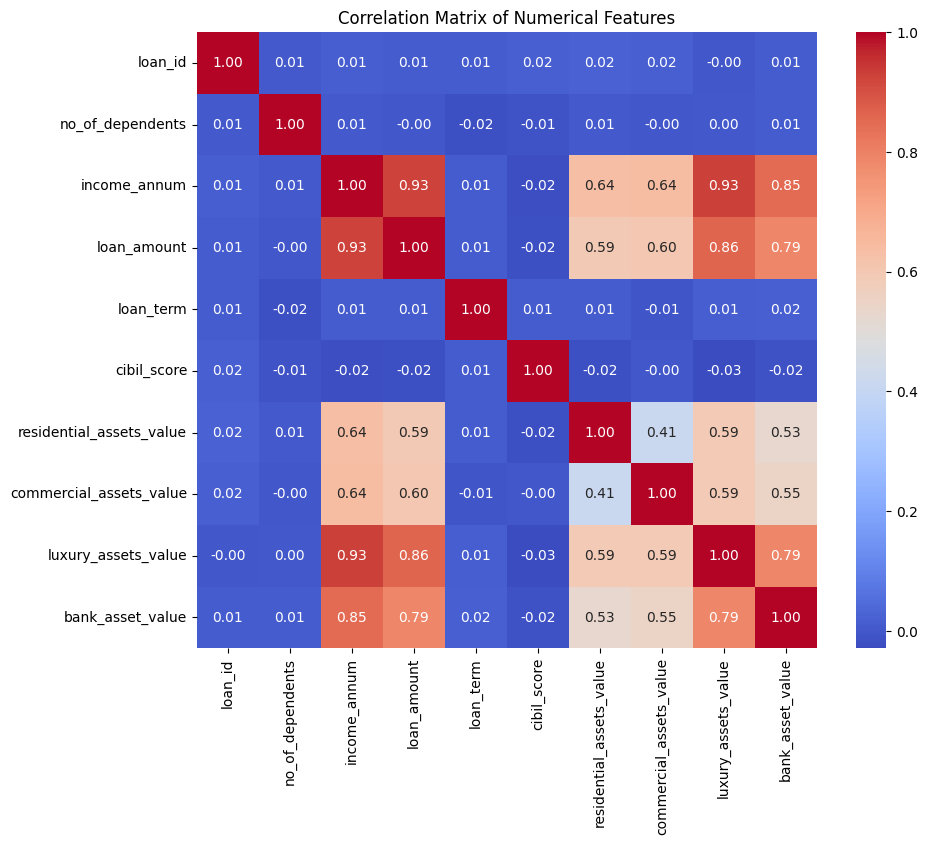

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numerical data only
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Principal Component Analysis (PCA)

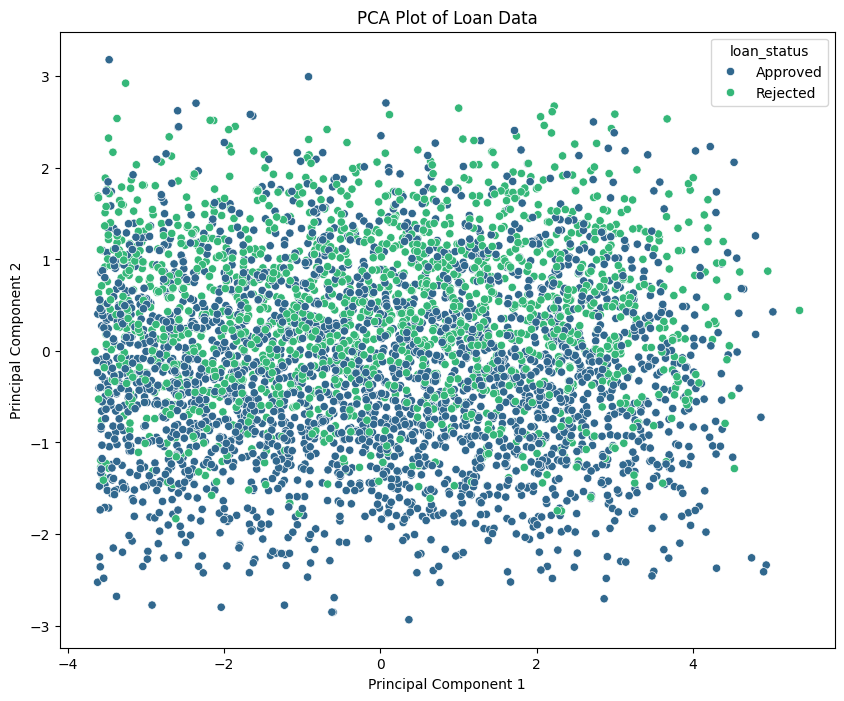

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Select numerical features only for PCA
numerical_data = data.select_dtypes(include=[np.number])

# Standardizing the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA result to the DataFrame
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Plot PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='loan_status', data=data, palette="viridis")
plt.title("PCA Plot of Loan Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

UMAP (Uniform Manifold Approximation and Projection)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 17.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 44.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


/opt/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


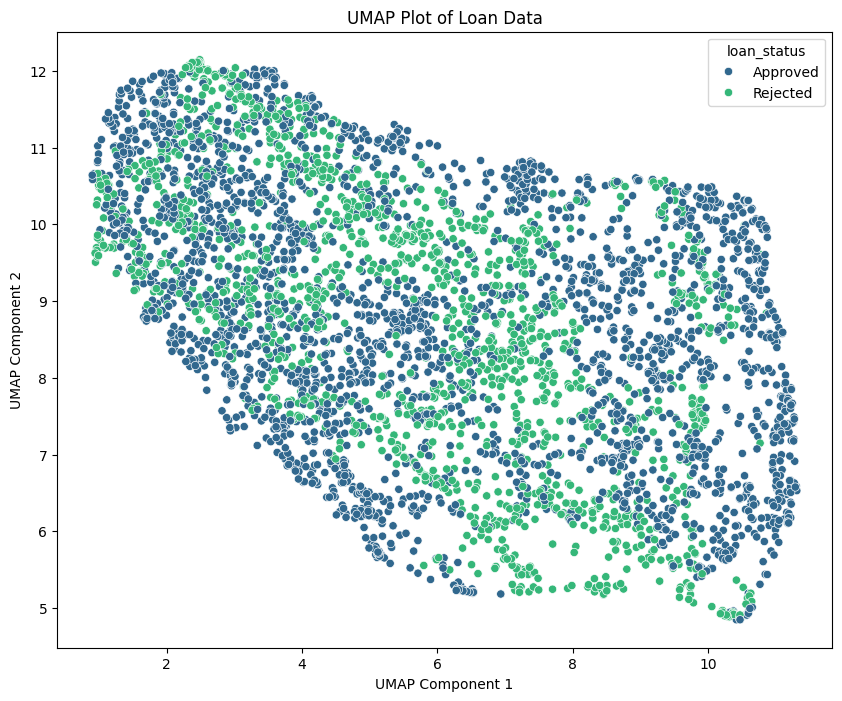

In [20]:
# Install UMAP
!pip install umap-learn  # Uncomment and run this line if you haven't installed umap-learn

import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Fit and transform data with UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(scaled_data)

# Add UMAP result to DataFrame
data['UMAP1'] = umap_result[:, 0]
data['UMAP2'] = umap_result[:, 1]

# Plot UMAP result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='loan_status', data=data, palette="viridis")
plt.title("UMAP Plot of Loan Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

t-SNE (t-Distributed Stochastic Neighbor Embedding)

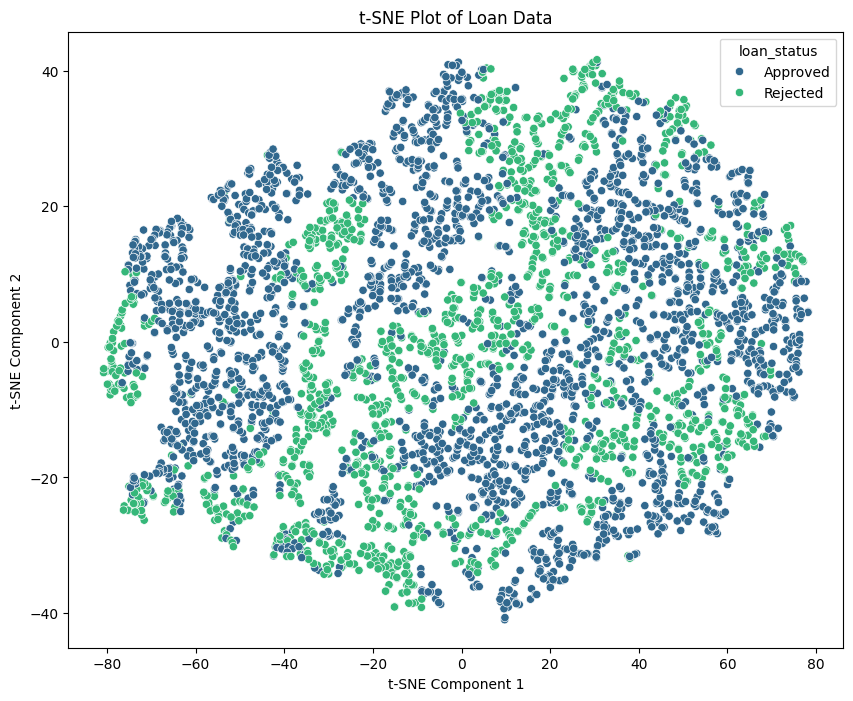

In [21]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction to 2 components
tsne_model = TSNE(n_components=2, random_state=42)
tsne_result = tsne_model.fit_transform(scaled_data)

# Add t-SNE result to DataFrame
data['TSNE1'] = tsne_result[:, 0]
data['TSNE2'] = tsne_result[:, 1]

# Plot t-SNE result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='loan_status', data=data, palette="viridis")
plt.title("t-SNE Plot of Loan Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Step 1: Clustering with K-Means

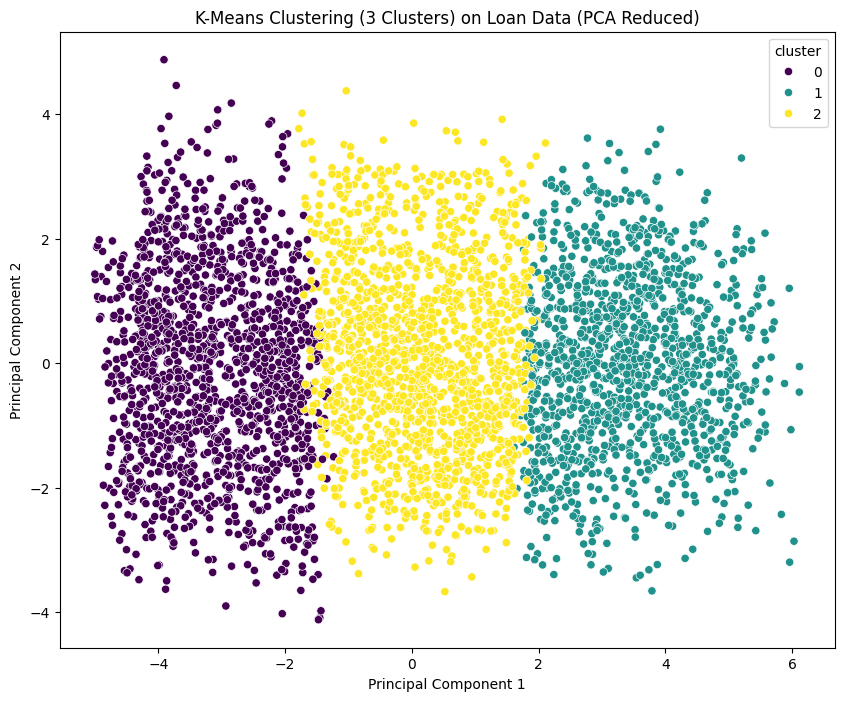

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for clustering
numerical_data = data.select_dtypes(include=[float, int])

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data, palette="viridis")
plt.title("K-Means Clustering (3 Clusters) on Loan Data (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Step 2: Anomaly Detection with Isolation Forest

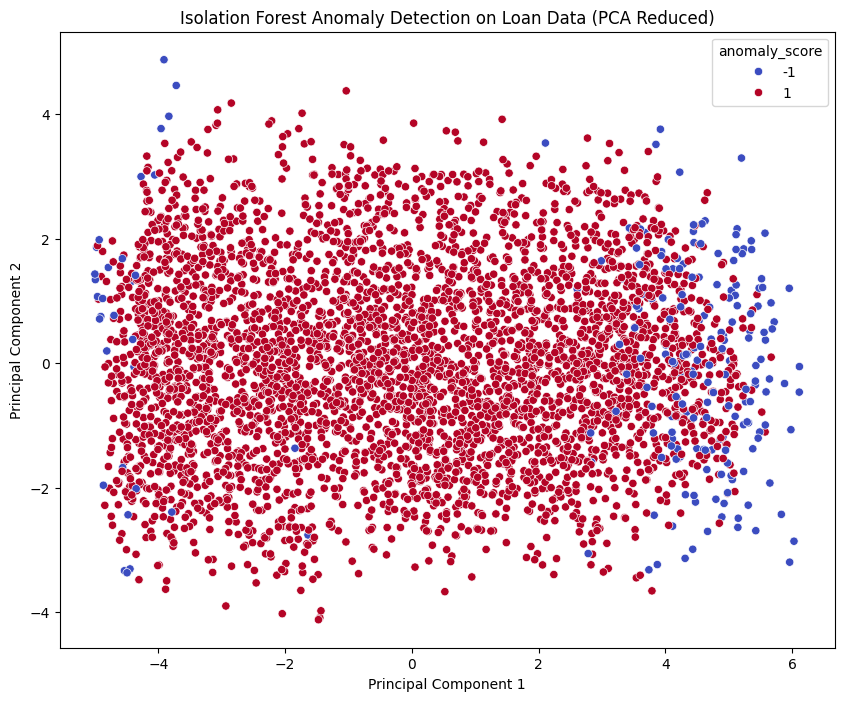

In [23]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest to detect anomalies
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly_score'] = isolation_forest.fit_predict(scaled_data)

# Visualize anomalies using PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='anomaly_score', data=data, palette="coolwarm")
plt.title("Isolation Forest Anomaly Detection on Loan Data (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.2 MB/s eta 0:00:00
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.4 MB/s eta 0:00:00
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 49.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Step 3: Dimensionality Reduction with Autoencoders

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


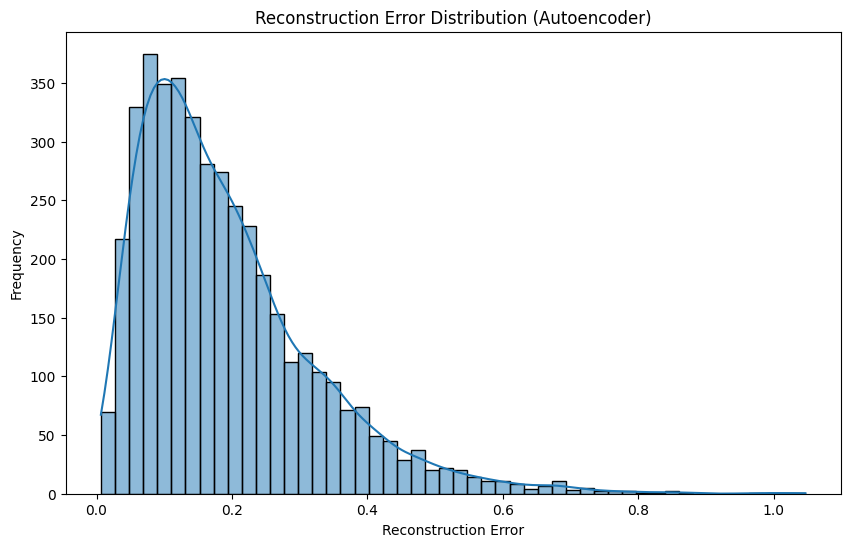

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define the autoencoder architecture
input_dim = scaled_data.shape[1]
encoding_dim = 5

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="linear")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Train the autoencoder
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2, verbose=0)

# Get reconstruction error for each sample
reconstructed_data = autoencoder.predict(scaled_data)
reconstruction_error = np.mean(np.square(scaled_data - reconstructed_data), axis=1)
data['reconstruction_error'] = reconstruction_error

# Visualize reconstruction errors (potential anomalies)
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_error, bins=50, kde=True)
plt.title("Reconstruction Error Distribution (Autoencoder)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()

Identify appropriate cross-validation strategy

Stratified K-Fold Cross-Validation

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Assuming `data` is your DataFrame and `loan_status` is the target column
# Encode the target variable to numeric if necessary
data['loan_status'] = LabelEncoder().fit_transform(data['loan_status'])  # 'Approved' -> 1, 'Rejected' -> 0

# Separate features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Identify categorical columns and set up preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set up a preprocessor to one-hot encode categorical data and scale numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Initialize Stratified K-Fold Cross-Validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform Stratified K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Split the data into training and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create a pipeline that includes preprocessing and model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Print metrics for the current fold
    print(f"Fold {fold} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Print average performance metrics across all folds
print("\nAverage Cross-Validation Metrics:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f}")

Fold 1 - Accuracy: 0.9110, Precision: 0.9020, Recall: 0.8571, F1-Score: 0.8790
Fold 2 - Accuracy: 0.9052, Precision: 0.8623, Recall: 0.8916, F1-Score: 0.8767
Fold 3 - Accuracy: 0.9204, Precision: 0.8875, Recall: 0.9040, F1-Score: 0.8957
Fold 4 - Accuracy: 0.9215, Precision: 0.9025, Recall: 0.8885, F1-Score: 0.8955
Fold 5 - Accuracy: 0.9261, Precision: 0.9034, Recall: 0.9006, F1-Score: 0.9020

Average Cross-Validation Metrics:
Accuracy: 0.9168
Precision: 0.8915
Recall: 0.8884
F1-Score: 0.8898


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = pd.read_csv('loan_approval_dataset.csv')  # Update with your file path
print("Column names:", data.columns)
print(data.head())

# Step 1: Data Preparation
# Clean 'loan_status' by stripping spaces and mapping to binary format
data[' loan_status'] = data[' loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})

# Drop rows where 'loan_status' is NaN (in case values didn’t match 'Approved' or 'Rejected')
data = data.dropna(subset=[' loan_status'])

# Ensure that data is not empty after cleaning
if data.empty:
    raise ValueError("Data is empty after cleaning and filtering 'loan_status'.")

# Step 2: Prepare features and target variable
y = data[' loan_status']
X = data.drop(columns=[' loan_status'])

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Define preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the model with a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Step 3: Hyperparameter Tuning
# Define hyperparameter grid for tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Perform grid search with cross-validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate best model on the validation set
y_pred_val = best_model.predict(X_val)
print("Validation Set Performance:\n", classification_report(y_val, y_pred_val))

# Step 4: Cross-Validation Analysis
# Lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Cross-validate with the best model
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the best model on each fold
    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_test_fold)
    
    # Calculate performance metrics
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold))
    recall_scores.append(recall_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold))

# Calculate average cross-validation performance metrics
print("\nCross-Validation Metrics (averaged across folds):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Column names: Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2    

Experiment 1: Feature Selection Using Recursive Feature Elimination (RFE)

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')  # Update with actual file path

# Step 1: Ensure correct column names by stripping whitespace
data.columns = data.columns.str.strip()

# Verify that 'loan_status' exists and check unique values
if 'loan_status' not in data.columns:
    raise ValueError("The column 'loan_status' is not found in the dataset. Verify the column names.")

# Display unique values in 'loan_status' to confirm mapping feasibility
print("Unique values in 'loan_status':", data['loan_status'].unique())

# Clean 'loan_status': convert to string, strip spaces, and map values
data['loan_status'] = data['loan_status'].astype(str).str.strip().map({'Approved': 1, 'Rejected': 0})

# Drop rows where 'loan_status' is NaN (i.e., values not matching 'Approved' or 'Rejected')
data = data.dropna(subset=['loan_status'])

# Confirm that data is not empty after filtering
if data.empty:
    raise ValueError("Data is empty after cleaning and filtering 'loan_status'. Check if 'loan_status' has unexpected values.")
print("Data shape after cleaning and filtering:", data.shape)

# Prepare features (X) and target (y)
y = data['loan_status']
X = data.drop(columns=['loan_status'])

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Define preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Step 2: Experiment 1 - Feature Selection using RFE with Logistic Regression
# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define logistic regression model with RFE
logreg = LogisticRegression(max_iter=1000, random_state=42)
pipeline_rfe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', RFE(estimator=logreg, n_features_to_select=8)),
    ('classifier', logreg)
])

# Train and evaluate logistic regression model with RFE-selected features
pipeline_rfe.fit(X_train, y_train)
y_pred_rfe = pipeline_rfe.predict(X_val)

print("Performance with Feature Selection (RFE):")
print(classification_report(y_val, y_pred_rfe))

# Step 3: Experiment 2 - Increase Model Complexity with Random Forest
# Define a Random Forest pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set up hyperparameter grid for Random Forest tuning
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum tree depth
    'classifier__min_samples_split': [2, 5, 10]  # Minimum samples for split
}

# Perform grid search with cross-validation for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best model and evaluate on validation set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_val)

print("Performance with Random Forest:")
print(classification_report(y_val, y_pred_rf))

Unique values in 'loan_status': [' Approved' ' Rejected']
Data shape after cleaning and filtering: (4269, 13)
Performance with Feature Selection (RFE):
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       323
           1       0.92      0.94      0.93       531

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854

Performance with Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

